<a href="https://colab.research.google.com/github/MogalaganiLavanya/Machine_Learning_project/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart disease prediction project**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
 heart_data=pd.read_csv("/content/heart.csv")

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

0 --> Defective Heart  
1 --> Healthy Heart

splitting the features and target


In [ ]:
X=heart_data.drop(columns='target')
Y=heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (717, 13) (308, 13)


model training


In [ ]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUTION

In [ ]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('accuracy on train data : ', training_data_accuracy)

accuracy on train data :  0.8647140864714087


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('accuracy on test data : ', test_data_accuracy)

accuracy on test data :  0.7922077922077922


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix=confusion_matrix(Y_test,X_test_prediction)

In [ ]:
print(cf_matrix)

[[108  42]
 [ 22 136]]


1.LOGISTIC REGRESSION

In [ ]:

input_data = (19,0,0,110,205,0,0,220,1,2.4,0,1,0)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person has a Heart disease')
else:
  print('The person does not have Heart disease')

[1]
The person does not have Heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from tkinter import *
import numpy as np
import pandas as pd


2.NAIVE BAYES

In [ ]:
def Naive_Bayes():
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.Naive_Bayes import BernoulliNB




Test Train Split no.  1 





Gaussian Naive Bayes model accuracy(in %): 80.93385214007782




Confusion Matrix
[[ 87  29]
 [ 20 121]]




F1 Score
0.8084394658408355




ROC Curve


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


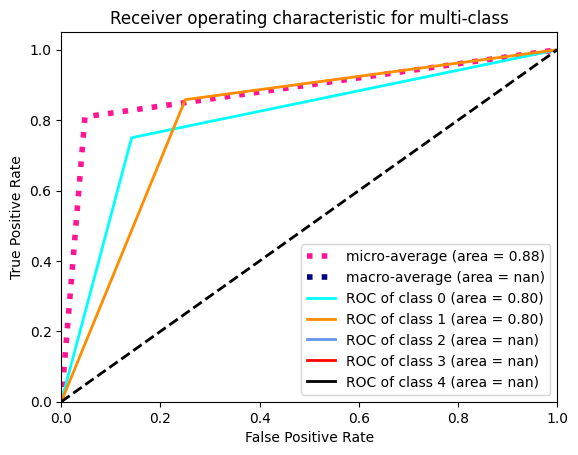




Test Train Split no.  2 





Gaussian Naive Bayes model accuracy(in %): 82.49027237354085




Confusion Matrix
[[106  22]
 [ 23 106]]




F1 Score
0.8249027237354085




ROC Curve


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


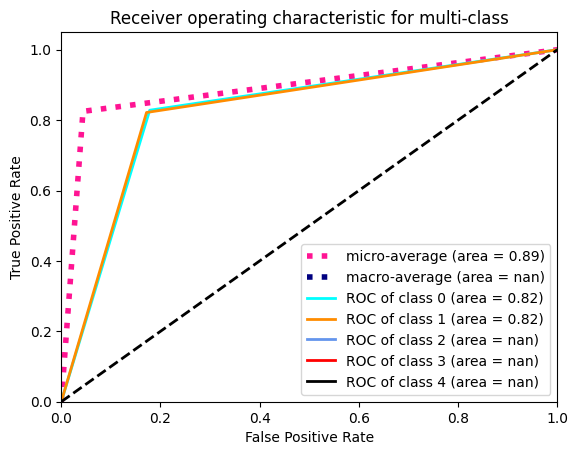




Test Train Split no.  3 





Gaussian Naive Bayes model accuracy(in %): 80.54474708171206




Confusion Matrix
[[ 97  33]
 [ 17 110]]




F1 Score
0.804833218751698




ROC Curve


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


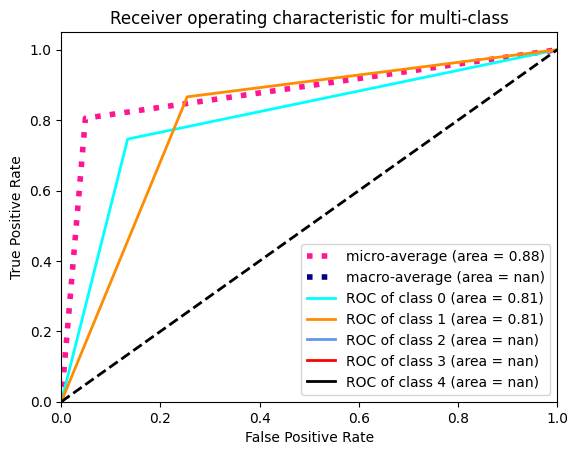




Test Train Split no.  4 





Gaussian Naive Bayes model accuracy(in %): 84.43579766536965




Confusion Matrix
[[100  22]
 [ 18 117]]




F1 Score
0.844197032955589




ROC Curve


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


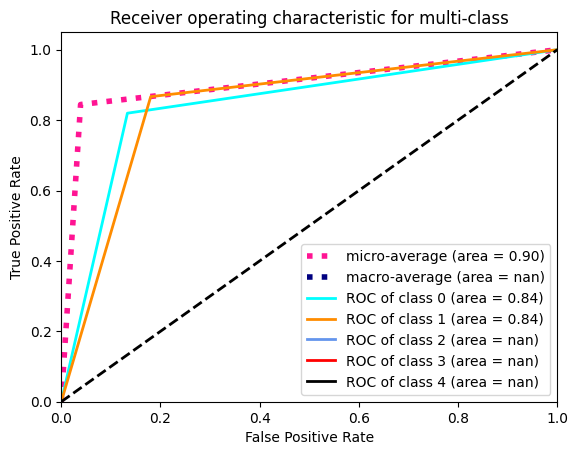




Test Train Split no.  5 





Gaussian Naive Bayes model accuracy(in %): 81.32295719844358




Confusion Matrix
[[ 99  22]
 [ 26 110]]




F1 Score
0.8133542215844948




ROC Curve


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


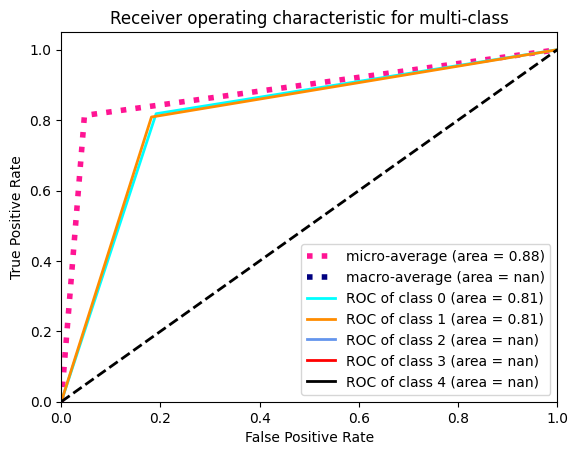

In [ ]:
from numpy.lib.function_base import interp
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interpolate

# reading CSV using Pandas and storing in dataframe
df = pd.read_csv('/content/heart.csv', header = None)

training_x=df.iloc[1:df.shape[0],0:13]
#print(training_set)

training_y=df.iloc[1:df.shape[0],13:14]
#print(testing_set)


# converting dataframe into arrays
x=np.array(training_x)
y=np.array(training_y)

for z in range(5):
    print("\n\n\nTest Train Split no. ",z+1,"\n\n\n")
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=None)
    # Gaussian function of sklearn
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)

    print("\n\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

    # convert 2D array to 1D array
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()

    print("\n\n\n\nConfusion Matrix")
    cf_matrix=confusion_matrix(y1,y_pred1)
    print(cf_matrix)

    print("\n\n\n\nF1 Score")
    f_score=f1_score(y1,y_pred1,average='weighted')
    print(f_score)

    # Matrix from 1D array
    y2=np.zeros(shape=(len(y1),5))
    y3=np.zeros(shape=(len(y_pred1),5))
    for i in range(len(y1)):
        y2[i][int(y1[i])]=1

    for i in range(len(y_pred1)):
        y3[i][int(y_pred1[i])]=1


    # ROC Curve generation
    n_classes = 5

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    print("\n\n\n\nROC Curve")
    # First aggregate all false positive rates
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()



In [ ]:
df = pd.read_csv('/content/heart.csv')
# extracting independent and dependent variable
x=df.iloc[:, [2,3]].values
y=df.iloc[:, 4].values

In [ ]:
# splitting the dataset into trainig and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [ ]:
 import seaborn as sns


3.CORRELATION FIGURE

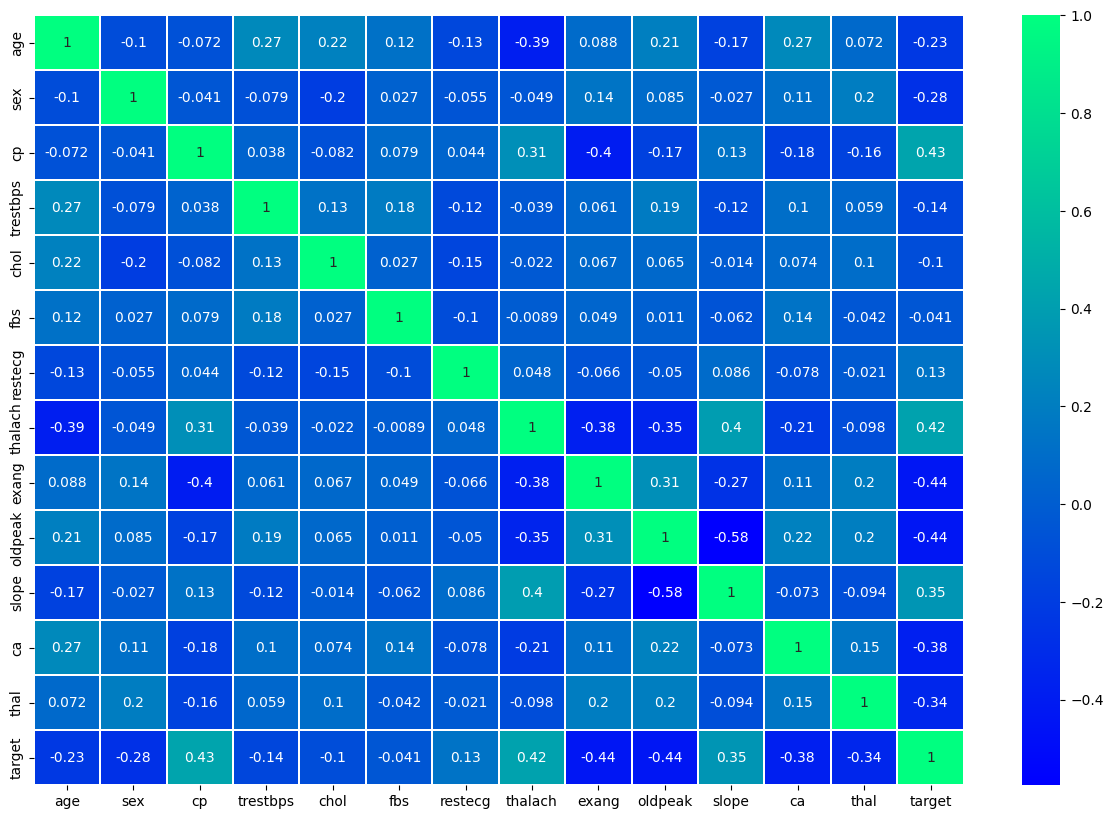

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

4.HISTOGRAM

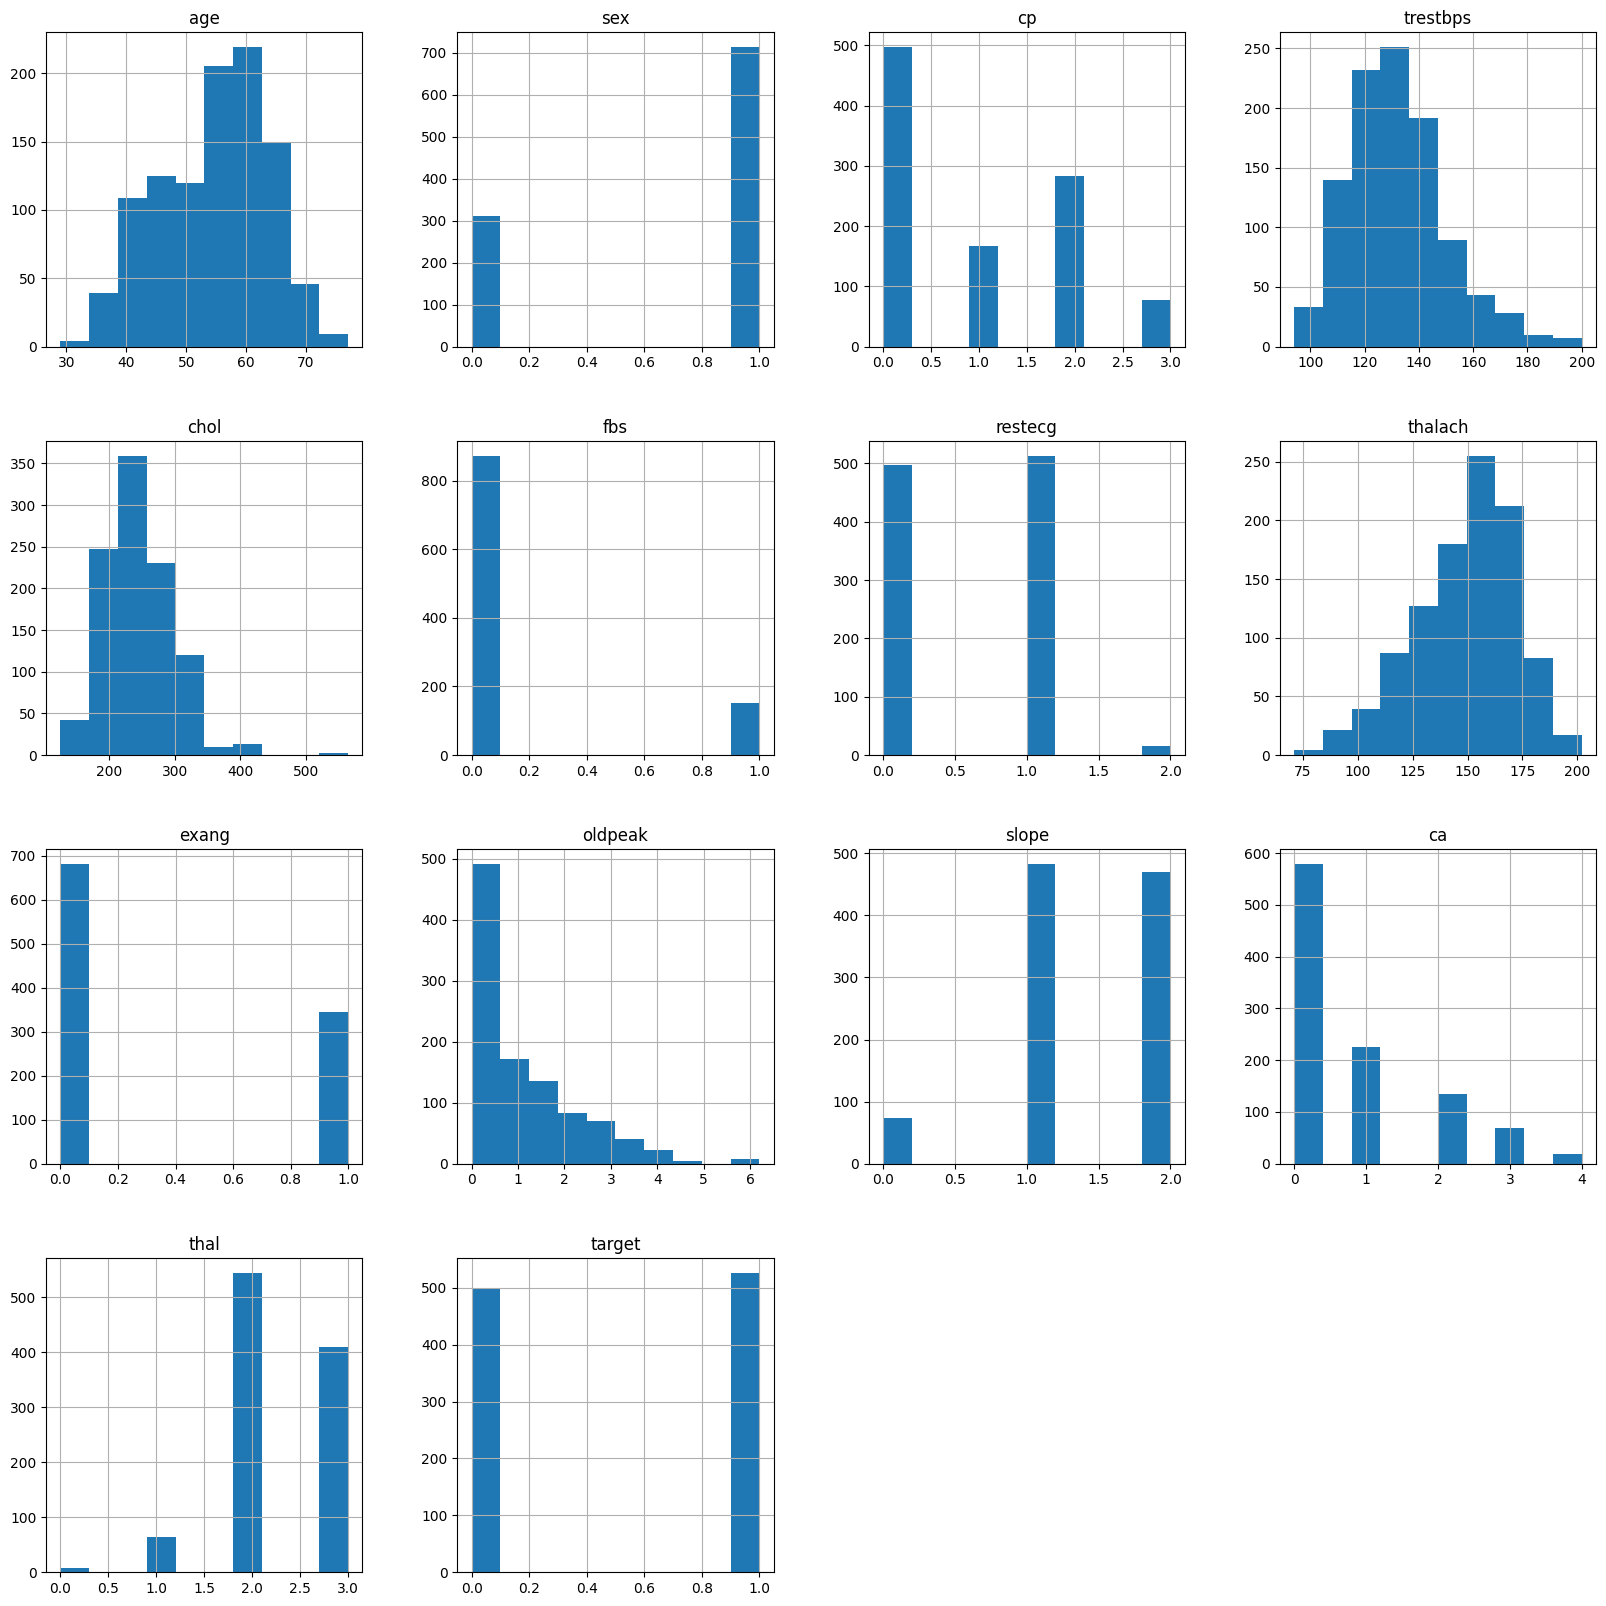

In [ ]:
heart_data.hist(figsize=(20,20))
plt.savefig('featuresplot')

5.KNN-(K-NEAREST NEIGHBORS)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score

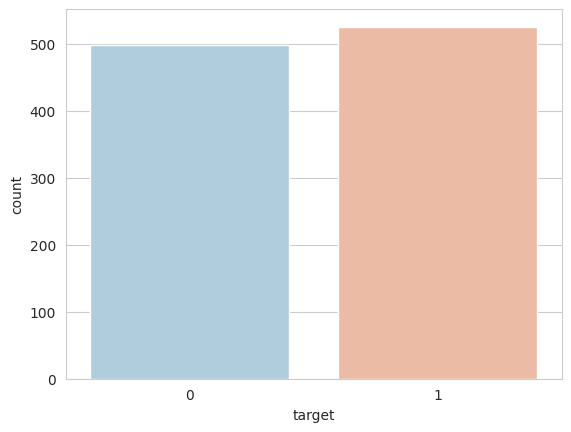

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='target', data=df , palette ="RdBu_r")
plt.show()

In [ ]:

knn_scores=[]
for k in range(1,10):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(x_train, y_train)
  knn_scores.append(knn_classifier.score(x_test, y_test))




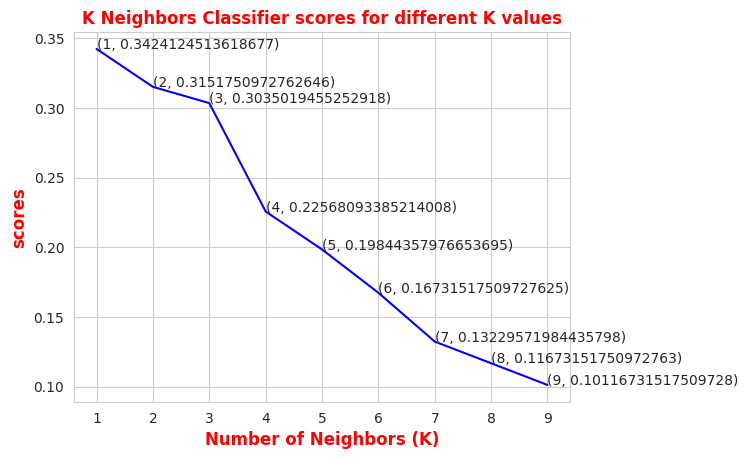

In [ ]:
plt.plot([k for k in range(1,10)], knn_scores,color='blue')
for i in range(1,10):
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,10)])
plt.xlabel('Number of Neighbors (K)',color='Red', weight='bold',fontsize='12')
plt.ylabel('scores',color='Red', weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values', color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=12)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y1,y_pred1)
print(cf_matrix)

[[ 99  22]
 [ 26 110]]


In [ ]:
f_score=f1_score(y1,y_pred1,average='weighted')
print(f_score)


0.8133542215844948


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
NumPy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.1


In [ ]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

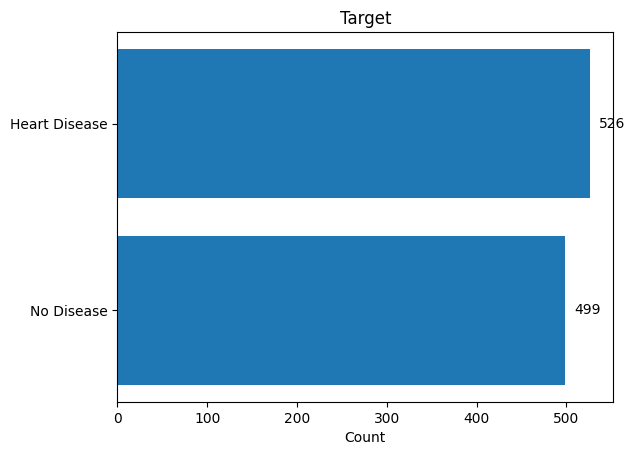

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()


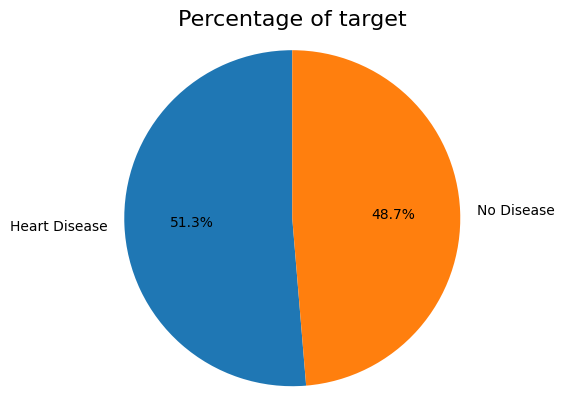

In [ ]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [ ]:
df.isna().sum() # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

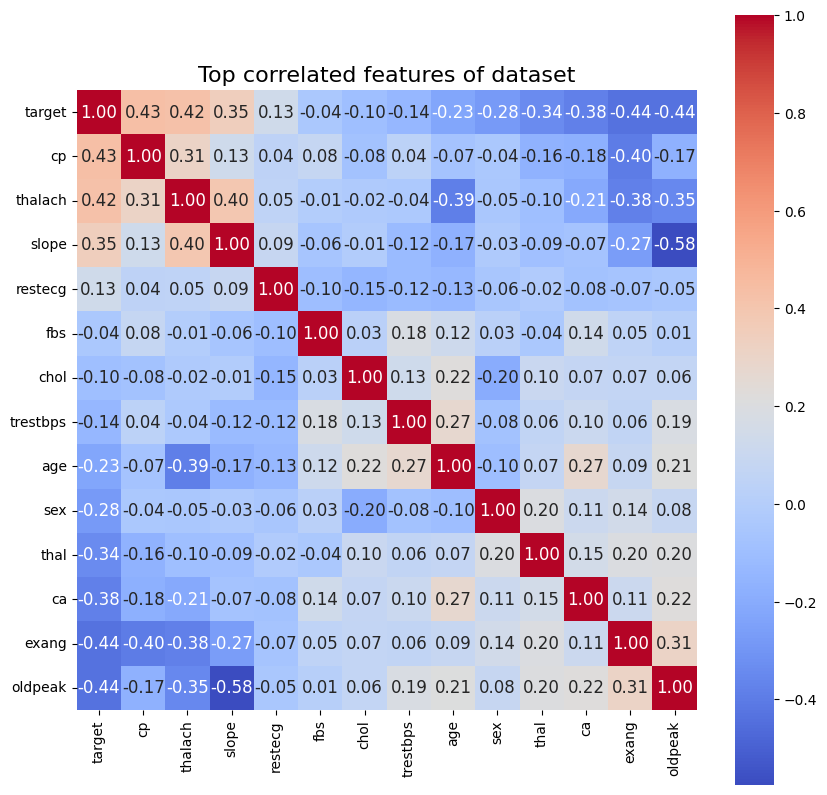

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [ ]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

In [ ]:
len(x_train)

768

In [ ]:
len(X_train) , len(X_test)

(717, 308)

In [ ]:
len(Y_train) , len(Y_test)

(717, 308)

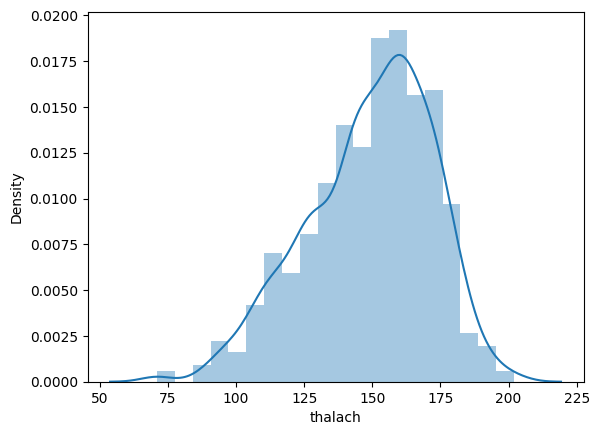

In [ ]:
ax = sns.distplot(df['thalach']) # histogram distribution

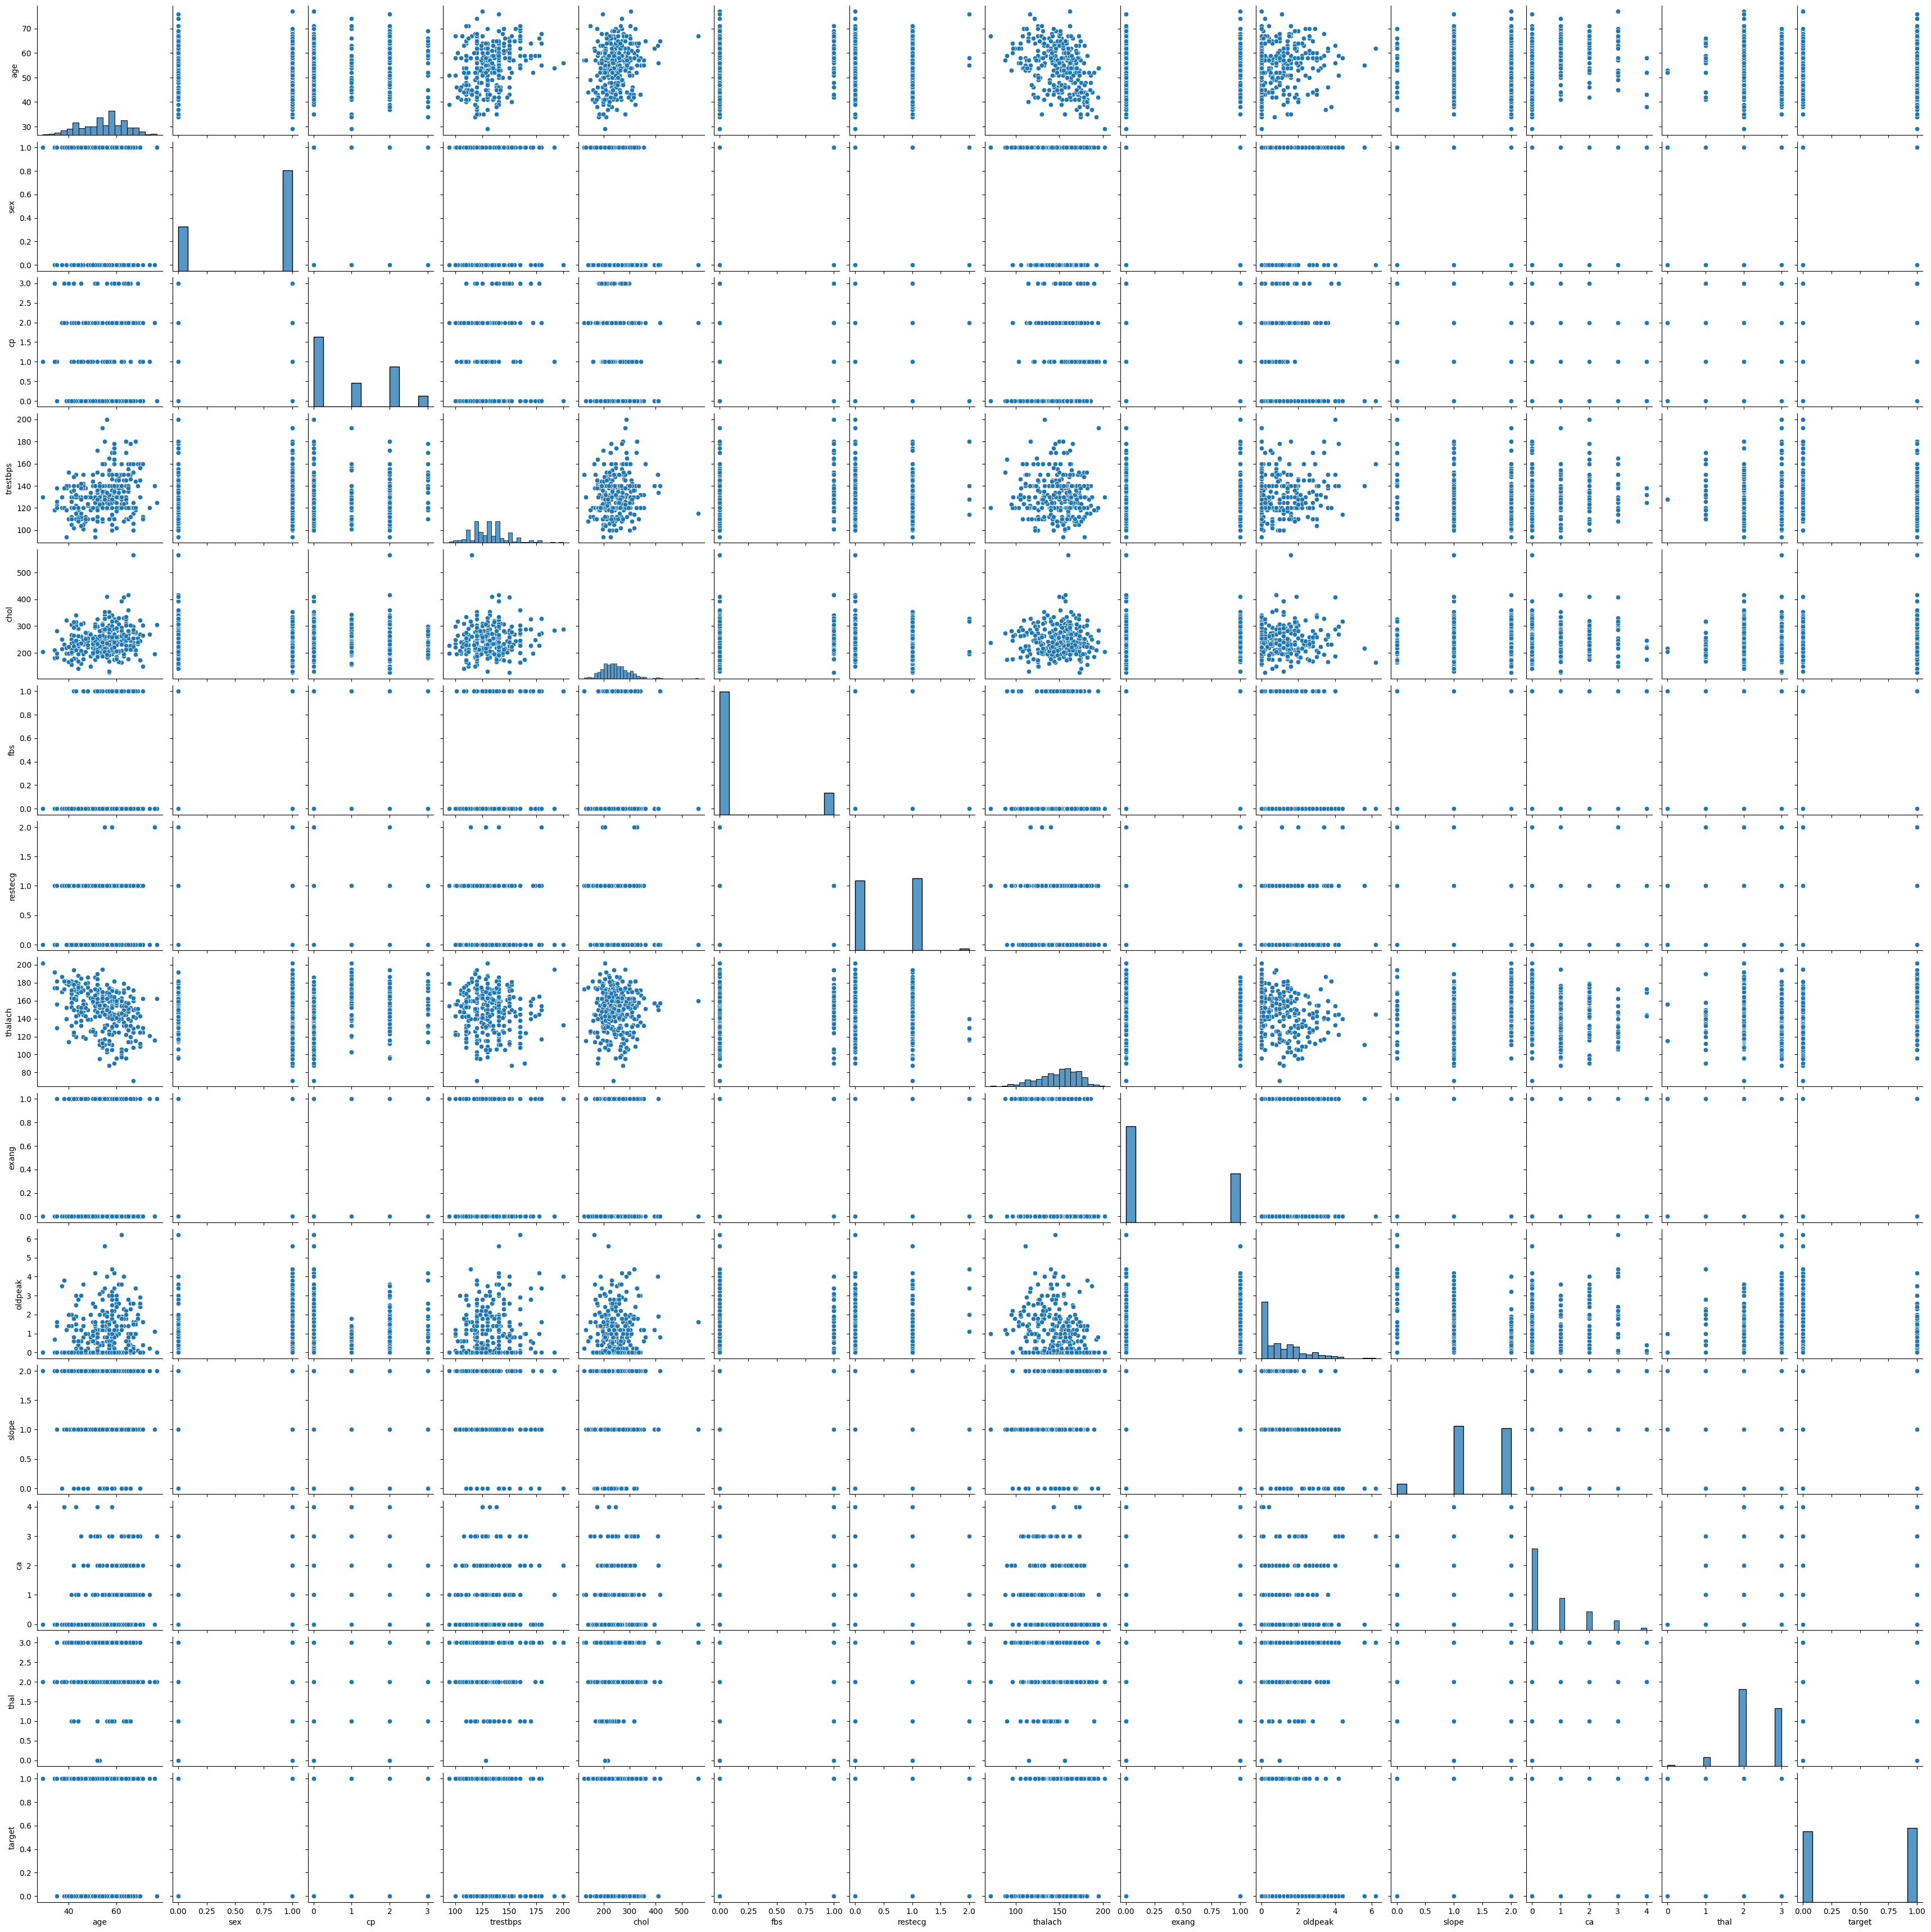

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1025, 13) (1025,)


In [ ]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
test_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error , accuracy_score


In [ ]:
mean_squared_error(y_test , test_pred)

3811.1634241245138

In [ ]:
accuracy_score(y_test , test_pred)

0.023346303501945526

In [ ]:
 import matplotlib.pyplot as plt
>>> from sklearn.datasets import make_classification
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.svm import SVC

In [ ]:
from sklearn import tree

In [ ]:
#logistic re
y1=y_test.ravel()
y_pred1=y_pred.ravel()

In [ ]:
print("\n\n\n\nConfusion Matrix")
cf_matrix=confusion_matrix(y1,y_pred1)
print(cf_matrix)






Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
